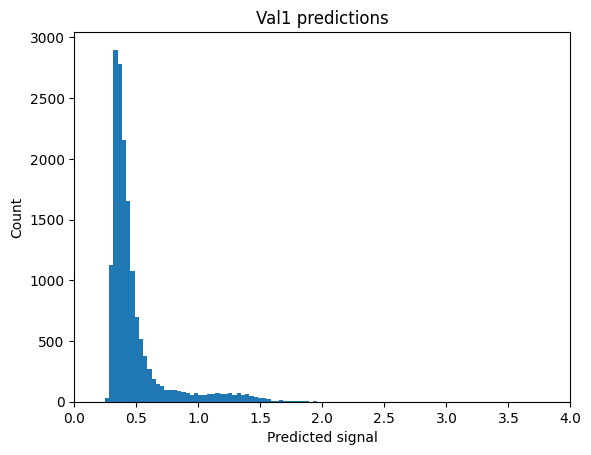

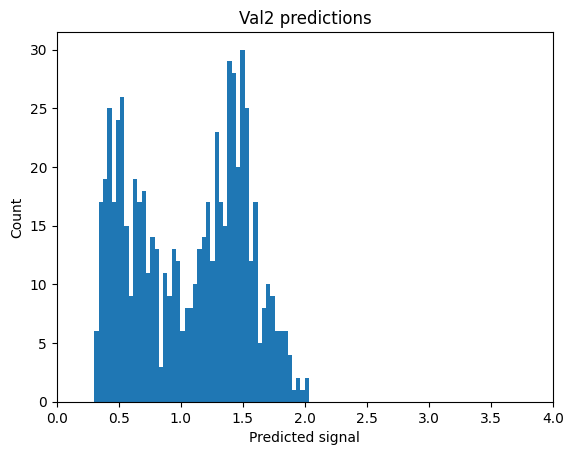

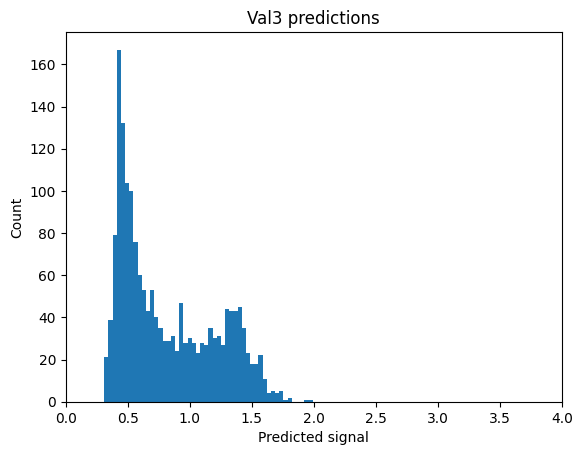

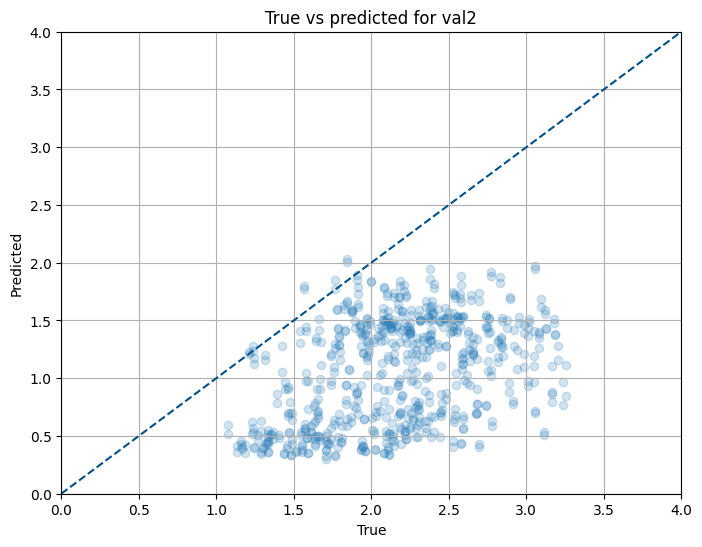

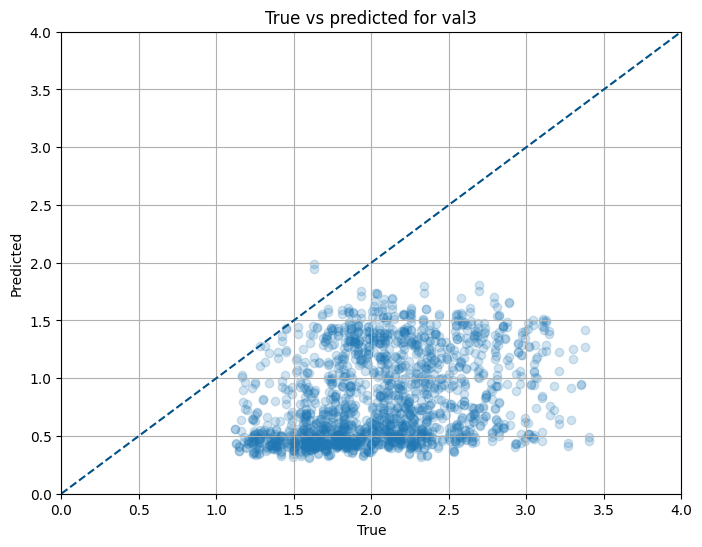

Pearson correlation coefficient for all: 0.4704, p-value: 0
Spearman correlation coefficient for all: 0.4074, p-value: 0
Pearson correlation coefficient for val2: 0.4033, p-value: 2.813e-27
Spearman correlation coefficient for val2: 0.4013, p-value: 5.22e-27
Pearson correlation coefficient for val3: 0.3171, p-value: 9.71e-43
Spearman correlation coefficient for val3: 0.3559, p-value: 4.045e-54


In [28]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
model='7xfw6h3t'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

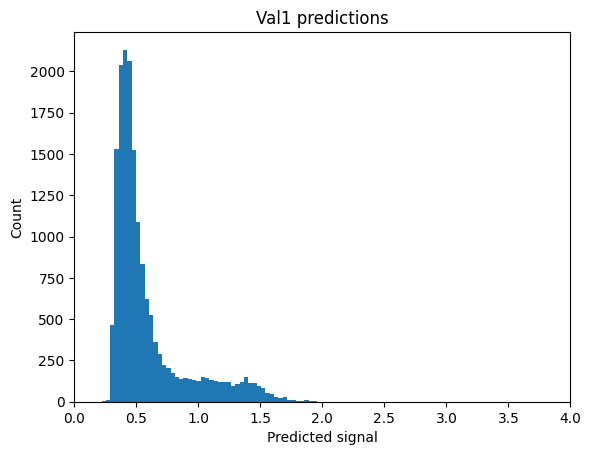

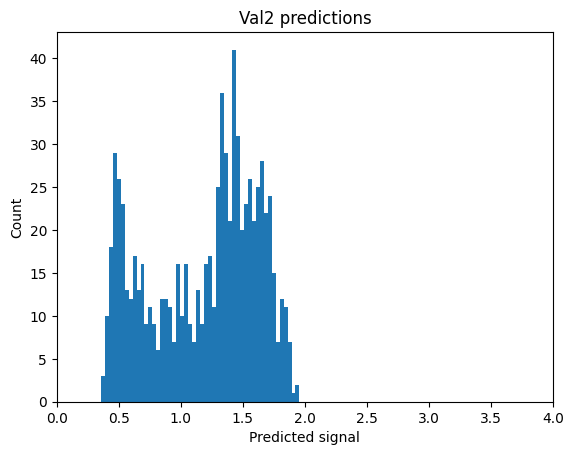

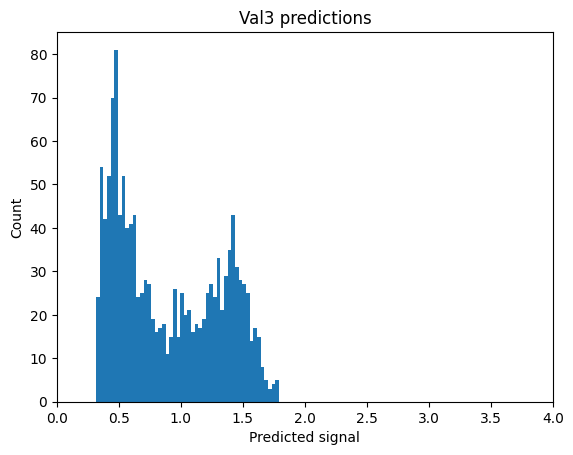

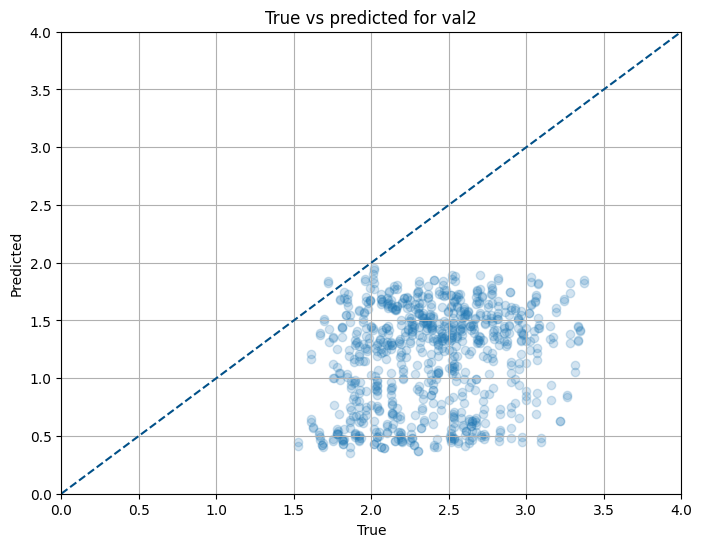

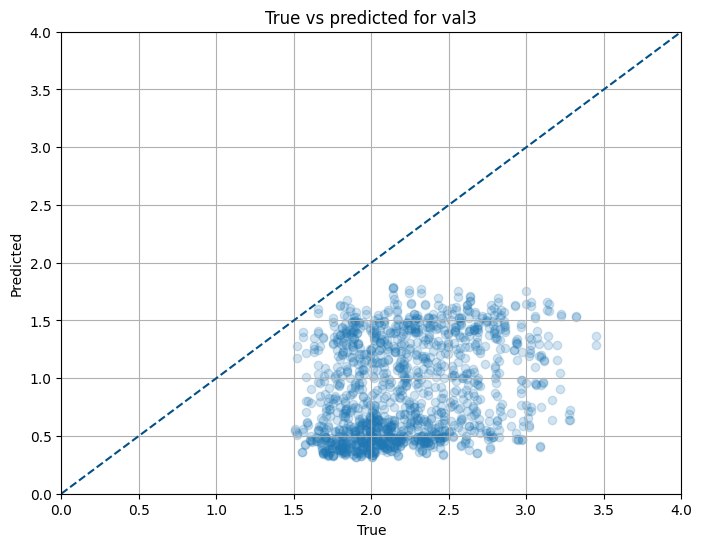

Pearson correlation coefficient for all: 0.3883, p-value: 0
Spearman correlation coefficient for all: 0.3164, p-value: 0
Pearson correlation coefficient for val2: 0.2003, p-value: 9.295e-09
Spearman correlation coefficient for val2: 0.1859, p-value: 1.023e-07
Pearson correlation coefficient for val3: 0.2777, p-value: 4.002e-25
Spearman correlation coefficient for val3: 0.2923, p-value: 9.034e-28


In [29]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='rat'
model='7xfw6h3t'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

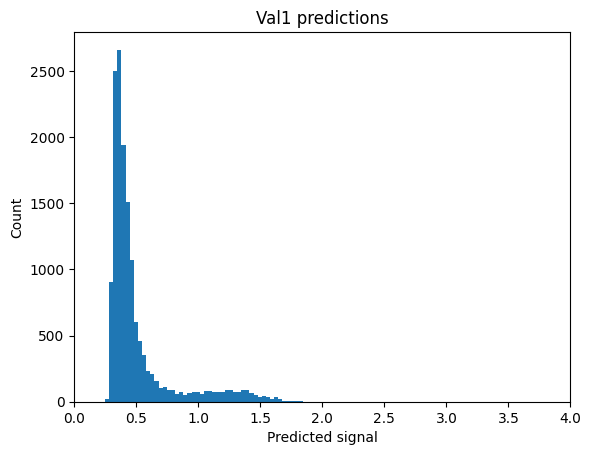

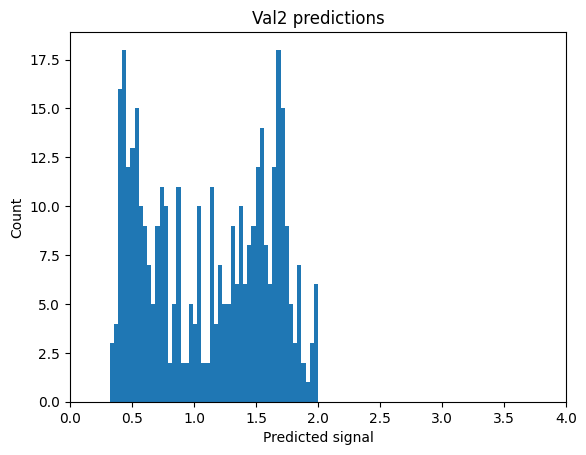

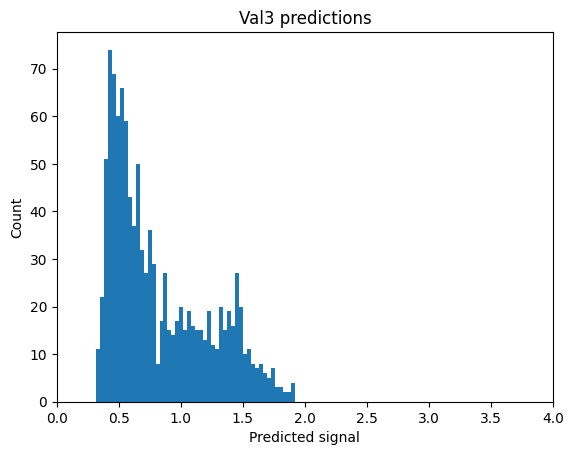

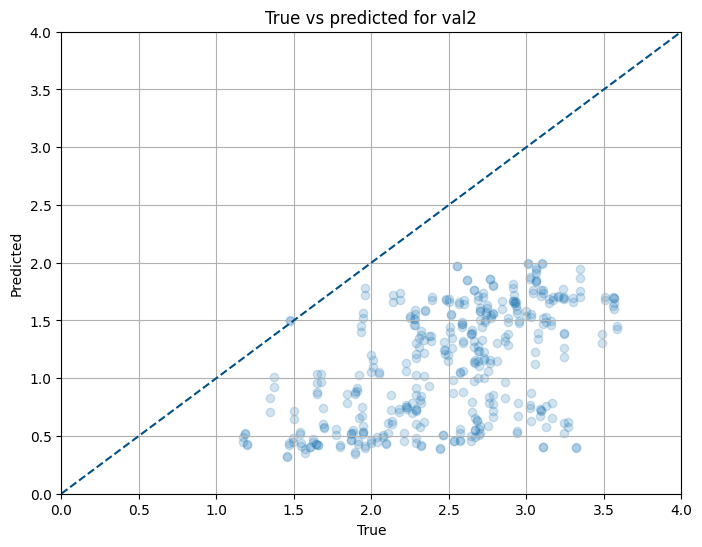

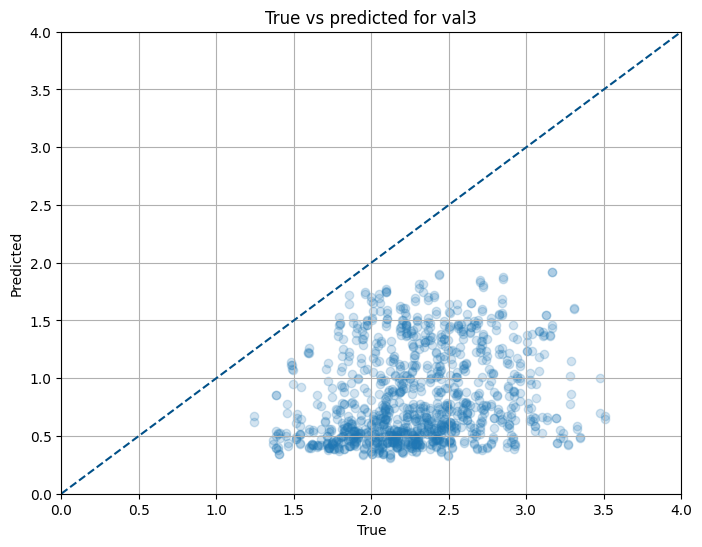

Pearson correlation coefficient for all: 0.3779, p-value: 0
Spearman correlation coefficient for all: 0.3360, p-value: 0
Pearson correlation coefficient for val2: 0.5343, p-value: 5.067e-30
Spearman correlation coefficient for val2: 0.5307, p-value: 1.426e-29
Pearson correlation coefficient for val3: 0.2294, p-value: 9.476e-15
Spearman correlation coefficient for val3: 0.2716, p-value: 2.92e-20


In [30]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='cow'
model='7xfw6h3t'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

ploth()
plotscatter()
correlate()

average val1 prediction: 0    0.60087
dtype: float64


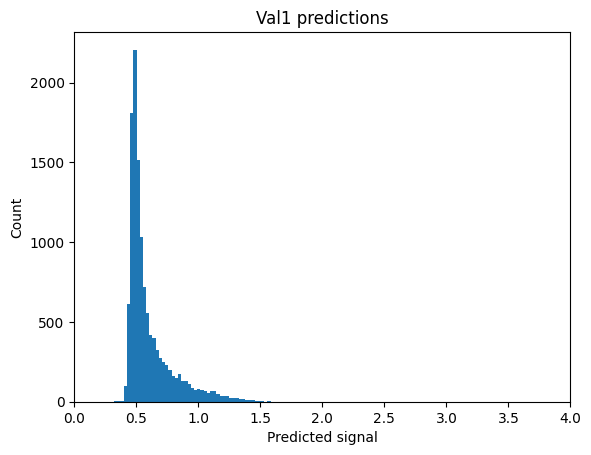

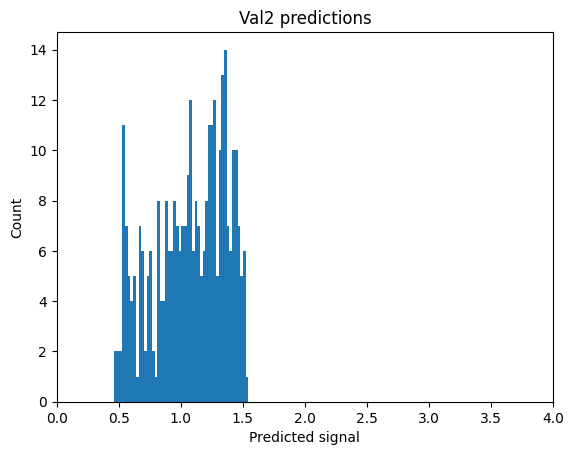

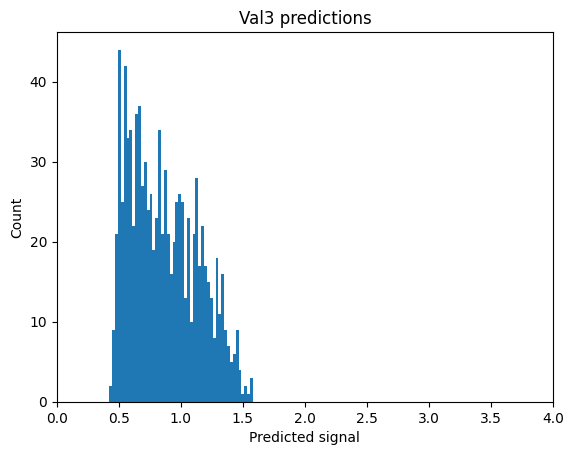

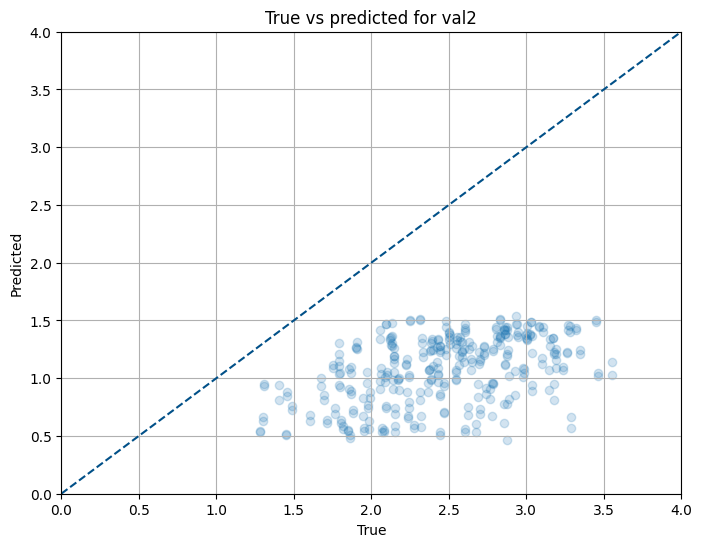

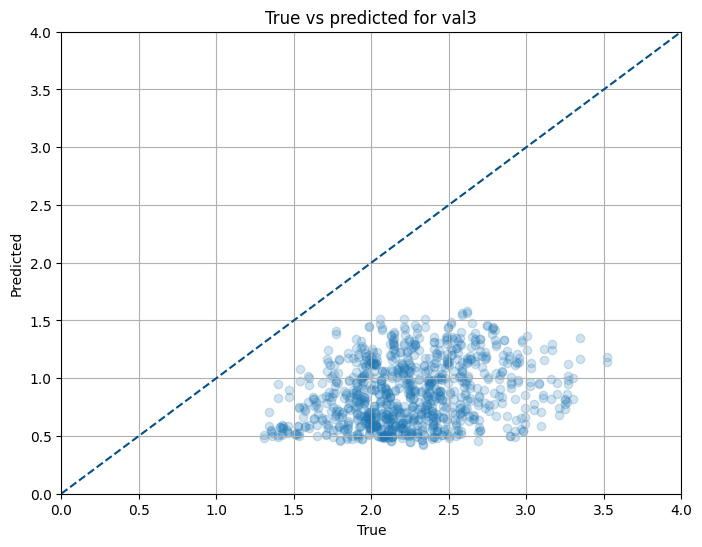

Pearson correlation coefficient for all: 0.4404, p-value: 0
Spearman correlation coefficient for all: 0.3424, p-value: 0
Pearson correlation coefficient for val2: 0.4560, p-value: 3.033e-18
Spearman correlation coefficient for val2: 0.4502, p-value: 9.047e-18
Pearson correlation coefficient for val3: 0.2742, p-value: 7.542e-18
Spearman correlation coefficient for val3: 0.2694, p-value: 2.901e-17


In [6]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='pig'
model='bdbi7l3n'

# load all the DFs
pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

# input sanity check
if len(pred_df) != val1_len+val2_len+val3_len:
    print("ERROR: predictions are a different length than validation sets")

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def plotscatter():
    # scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def ploth():
    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)

print(f'average val1 prediction: {pred_val1_df.mean()}')
ploth()
plotscatter()
correlate()

0    0.60087
dtype: float64